In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

array([0.        , 0.3078    , 0.62508024, 0.84347931])

'4.'

'zeros/poles'

[0.0]

[0.5154 - 0.295572055512696*I, 0.5154 + 0.295572055512696*I]

-0.397138411754788

0.9553072625698323

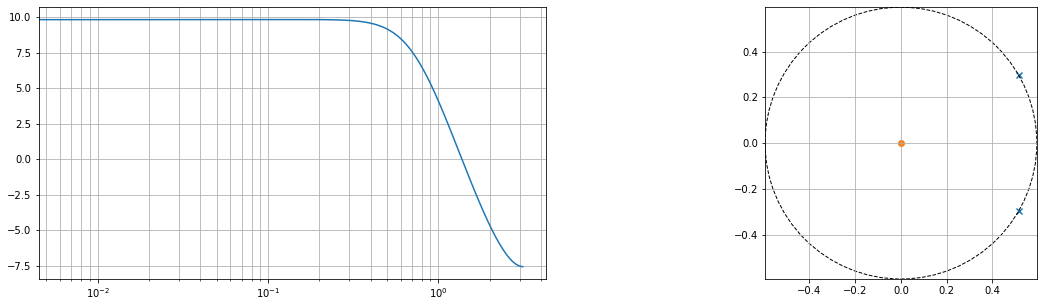

In [7]:
# b.1

## 3
y = np.zeros(4)
y[0] = 0
y[1] = 0.3078
y[2] = y[1]+1.0308*y[1]
y[3] = y[1]+1.0308*y[2]-0.3530*y[1]
display(y)

## 4)
display("4.")
z = sp.symbols("z")
expZeros = 0.3078*z
expPoles = 1*z**(2)-1.0308*z+0.3530
zeros = sp.solve(sp.Eq(0, expZeros), z)
poles = sp.solve(sp.Eq(0, expPoles), z)
display("zeros/poles", zeros, poles)

## 5)
# tmp solution to hardcode these from the results above
zeros = [0]
poles = [0.5154-0.2955j, 0.5154+0.2956j]

b, a = signal.zpk2tf(zeros, poles, 1)
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
plotFilterDigital(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

## 6)
exp = (0.3078*z**(-1))/(1 -1.0308*z**(-1)+0.3530*z**(-2))
expDcGain = exp.subs({z: sp.exp(-1j*0)})
expDcGaindB = (20*sp.log(expDcGain, 10)).evalf()
tmp = (0.3078)/(1-1.0308+0.3530)
display(expDcGaindB, tmp)

'4.'

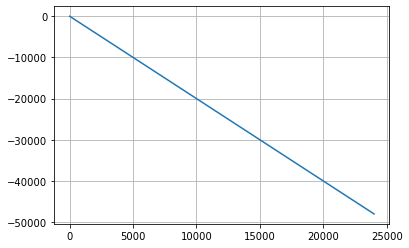

'5.'

2.61799387799149

[0.137832223855448,
 -0.159154943091895,
 0.166666666666667,
 -0.159154943091895,
 0.137832223855448]

0.137832223855448 - 0.159154943091895/z + 0.166666666666667/z**2 - 0.159154943091895/z**3 + 0.137832223855448/z**4

[1.31468064338104]

1.31468064338104

In [3]:
# B.2
fs = 48*10**3
fc = 20*10**3

## 4)
display("4.")
M = 4
x = np.arange(0, 24*10**3)
y = x*(-M/2)

fig, ax = plt.subplots()
ax.grid()
ax.plot(x,y)
plt.show()

## 5)
display("5.")
wc = 2*sp.pi*(fc/fs)
### from 2017re b.2 (added a limit)
n  = sp.symbols("n")
firstExp = (sp.sin(sp.pi*(n-(M/2))))/(sp.pi*(n-(M/2)))
lastExp = (sp.sin(wc*(n-(M/2))))/(sp.pi*(n-(M/2)))
hdExp = firstExp - lastExp
hdn = [sp.limit(hdExp, n, i).evalf() for i in range(M+1)]
display(wc.evalf(), hdn)

## 6) determine max gain
w = sp.pi
z, G = sp.symbols("z G")
Hz = np.array([val*z**(-1*i) for i, val in enumerate(hdn)]).sum()
HzGain = sp.solve(sp.Eq(1, G*Hz.subs({z: sp.exp(-1j*w)})), G)

### alternative way
G = 1/((np.array(hdn)*[1,-1,1,-1,1]).sum())
display(Hz, HzGain, G)



In [4]:
# b.3
fs = 8*10**3
fc = 1*10**3

wc = 2*sp.pi*(fc/fs)
Td = 1/fs
OmegaCWrap = (2/Td)*sp.tan(wc/2)
display(wc, OmegaCWrap.evalf())

z, s, Omegac = sp.symbols("z s \Omega_c")
Has = Omegac/(s+Omegac)
zExp = (2/Td)*((z-1)/(z+1))
Hz = Has.subs({s: zExp, Omegac: OmegaCWrap})
Hz = Hz.evalf().simplify().factor()

display(Has, zExp, Hz.evalf().simplify().factor())

## dcScale
G = sp.symbols("G")
gain = sp.solve(sp.Eq(20*sp.log(G*Hz.subs({z: sp.exp(-1*0)}), 10), 10), G)[0]
display(gain)

gHz = gain*Hz
display(gHz)

## verify gain
(20*sp.log(abs(gHz.subs({z: sp.exp(1j*wc)})).evalf(), 10)).evalf()

0.25*pi

6627.41699796952

\Omega_c/(\Omega_c + s)

16000.0*(z - 1)/(z + 1)

0.292893218813452*(z + 1)/(1.0*z - 0.414213562373095)

3.16227766016838

0.92620968266859*(z + 1)/(1.0*z - 0.414213562373095)

6.98970004336019 + 1.0491950892405e-24*I